In [ ]:
from google.colab import drive
drive.mount('/content/drive')
TrainingImagePath='/content/drive/My Drive/BTL_TTNT/data_train'

Mounted at /content/drive


<Figure size 14400x14400 with 0 Axes>

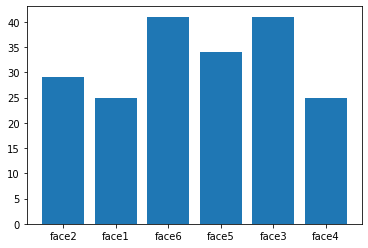

<Figure size 14400x14400 with 0 Axes>

In [ ]:
import os
import PIL
from numpy import  asarray,array,uint8
import matplotlib.pyplot as plt
import numpy as np

# đếm mỗi thư mục có bao nhiêu ảnh
def load_data(PATH):
  lables,totals=os.listdir(PATH),[]
  for label in lables:
    totals.append(len(os.listdir(os.path.join(PATH,label))))
  return lables,totals
    
X,Y = load_data(TrainingImagePath)

bars = plt.bar(X,Y)
plt.figure(figsize=(200,200))

vì data quá ít nên phải Generator để tăng số lượng ảnh lên nhằm tăng độ chính xác của model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# xác định train_data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False)
# tạo Training Data 
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')
# tạo Testing Data
test_datagen = ImageDataGenerator() # tăng ảnh lên
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')
# các labels cho từng mặt
training_set.class_indices
test_set.class_indices

Found 195 images belonging to 6 classes.
Found 195 images belonging to 6 classes.


{'face1': 0, 'face2': 1, 'face3': 2, 'face4': 3, 'face5': 4, 'face6': 5}

(16, 224, 224, 3)


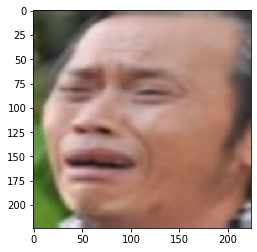

(16, 224, 224, 3)


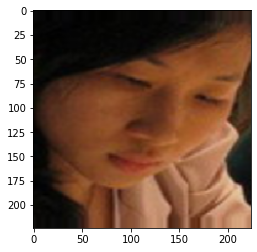

(16, 224, 224, 3)


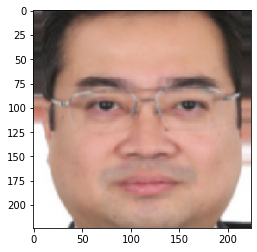

(16, 224, 224, 3)


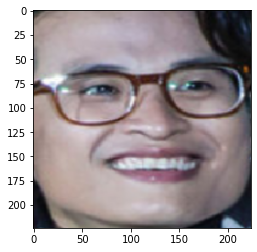

(16, 224, 224, 3)


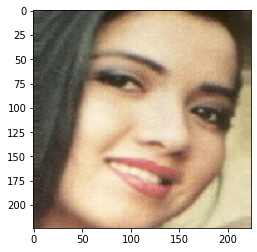

In [ ]:
for _ in range(5):
    img, label = training_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model, optimizers
import numpy as np
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=6, activation="softmax")) # 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.callbacks import TensorBoard
learning_rate= 5e-5
"adam"
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint

import time
#thời gian train
StartTime=time.time()

# Tạo callback
filepath="checkpoint.hdf5" # nó lưu lại kết quả tốt nhất 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# bắt đầu train model 
history = model.fit(training_set, epochs=20, validation_data=test_set, shuffle=True, callbacks=[checkpoint],verbose=1)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 1.7918 - accuracy: 0.2256
Epoch 00001: val_accuracy improved from -inf to 0.21026, saving model to checkpoint.hdf5
13/13 [==============================] - 51s 3s/step - loss: 1.7918 - accuracy: 0.2256 - val_loss: 12.1029 - val_accuracy: 0.2103
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 1.7831 - accuracy: 0.2103
Epoch 00002: val_accuracy did not improve from 0.21026
13/13 [==============================] - 7s 545ms/step - loss: 1.7831 - accuracy: 0.2103 - val_loss: 27.1869 - val_accuracy: 0.2103
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 1.7939 - accuracy: 0.2308
Epoch 00003: val_accuracy did not improve from 0.21026
13/13 [==============================] - 4s 334ms/step - loss: 1.7939 - accuracy: 0.2308 - val_loss: 21.2811 - val_accuracy: 0.2103
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 1.7807 - accuracy: 0.2103
Epoch 00004: val_accuracy did n

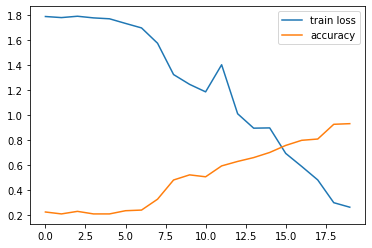

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()
plt.show()

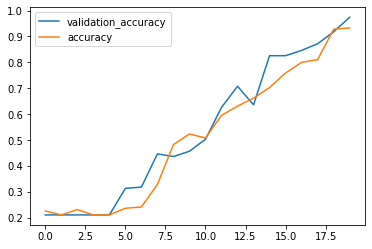

In [ ]:
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()

face6


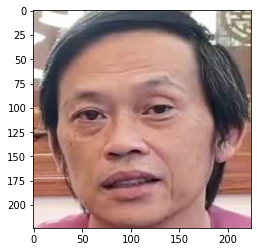

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image = load_img('/content/drive/My Drive/BTL_TTNT/data_test/HoaiLinh_test.png', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
yhat = model.predict(image)
x = int(np.argmax(yhat))+1
print("face"+str(x))